In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc
connection = pyodbc.connect('Driver={SQL Server};'
                                'Server=DESKTOP-0SB31D9;'
                                'Database=AdventureWorks2017;'
                                'Trusted_Connection=True;')

cursor = connection.cursor() 

In [3]:
import pandas as pd
import pandas.io.sql as psql

In [4]:
pip install pysqldf

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from pandasql import *
pysqldf = lambda q: sqldf(q, locals())

In [8]:
query = '''SELECT * FROM HumanResources.EmployeeDepartmentHistory'''

In [9]:
df = pd.read_sql(query, connection)

In [10]:
print(df.head(10))

   BusinessEntityID  DepartmentID  ShiftID   StartDate     EndDate  \
0                 1            16        1  2009-01-14        None   
1                 2             1        1  2008-01-31        None   
2                 3             1        1  2007-11-11        None   
3                 4             1        1  2007-12-05  2010-05-30   
4                 4             2        1  2010-05-31        None   
5                 5             1        1  2008-01-06        None   
6                 6             1        1  2008-01-24        None   
7                 7             6        1  2009-02-08        None   
8                 8             6        1  2008-12-29        None   
9                 9             6        1  2009-01-16        None   

  ModifiedDate  
0   2009-01-13  
1   2008-01-30  
2   2007-11-10  
3   2010-05-28  
4   2010-05-30  
5   2008-01-05  
6   2008-01-23  
7   2009-02-07  
8   2008-12-28  
9   2009-01-15  


In [11]:
query = '''SELECT * FROM HumanResources.Department'''

In [12]:
df = pd.read_sql(query, connection)

In [13]:
print(df.head(10))

   DepartmentID                      Name  \
0             1               Engineering   
1             2               Tool Design   
2             3                     Sales   
3             4                 Marketing   
4             5                Purchasing   
5             6  Research and Development   
6             7                Production   
7             8        Production Control   
8             9           Human Resources   
9            10                   Finance   

                              GroupName ModifiedDate  
0              Research and Development   2008-04-30  
1              Research and Development   2008-04-30  
2                   Sales and Marketing   2008-04-30  
3                   Sales and Marketing   2008-04-30  
4                  Inventory Management   2008-04-30  
5              Research and Development   2008-04-30  
6                         Manufacturing   2008-04-30  
7                         Manufacturing   2008-04-30  
8  Execut

In [14]:
query = '''SELECT * FROM HumanResources.Employee'''

In [52]:
df = pd.read_sql(query, connection)

In [53]:
print(df.head(10))

   BusinessEntityID NationalIDNumber                   LoginID  \
0                 1        295847284      adventure-works\ken0   
1                 2        245797967    adventure-works\terri0   
2                 3        509647174  adventure-works\roberto0   
3                 4        112457891      adventure-works\rob0   
4                 5        695256908     adventure-works\gail0   
5                 6        998320692   adventure-works\jossef0   
6                 7        134969118    adventure-works\dylan0   
7                 8        811994146    adventure-works\diane1   
8                 9        658797903     adventure-works\gigi0   
9                10        879342154  adventure-works\michael6   

  OrganizationNode  OrganizationLevel                           JobTitle  \
0             None                NaN            Chief Executive Officer   
1             b'X'                1.0      Vice President of Engineering   
2         b'Z\xc0'                2.0        

In [61]:
sql_query = pd.read_sql_query('''SELECT eh.BusinessEntityID as bID, d.Name as n, e.NationalIDNumber as nat FROM HumanResources.EmployeeDepartmentHistory as eh, HumanResources.Employee as e,HumanResources.Department as d''',connection)
print((sql_query).head(10))

   bID                 n       nat
0    1  Document Control  10708100
1    2  Document Control  10708100
2    3  Document Control  10708100
3    4  Document Control  10708100
4    4  Document Control  10708100
5    5  Document Control  10708100
6    6  Document Control  10708100
7    7  Document Control  10708100
8    8  Document Control  10708100
9    9  Document Control  10708100


In [75]:
sql_query = pd.read_sql_query('''SELECT eh.BusinessEntityID as bID, d.Name as n, e.NationalIDNumber as nat FROM HumanResources.EmployeeDepartmentHistory as eh, HumanResources.Employee as e,HumanResources.Department as d WHERE d.DepartmentID= 3 ''',connection)
print((sql_query).head(10))

   bID      n       nat
0    1  Sales  10708100
1    2  Sales  10708100
2    3  Sales  10708100
3    4  Sales  10708100
4    4  Sales  10708100
5    5  Sales  10708100
6    6  Sales  10708100
7    7  Sales  10708100
8    8  Sales  10708100
9    9  Sales  10708100


In [76]:
sql_query = pd.read_sql_query('''SELECT eh.BusinessEntityID as bID, d.Name as n, e.NationalIDNumber as nat FROM HumanResources.EmployeeDepartmentHistory as eh, HumanResources.Employee as e,HumanResources.Department as d WHERE d.DepartmentID= 3 and NationalIDNumber>38416288
ORDER BY NationalIDNumber desc ''',connection)
print((sql_query).head(10))

   bID      n        nat
0    1  Sales  999440576
1    2  Sales  999440576
2    3  Sales  999440576
3    4  Sales  999440576
4    4  Sales  999440576
5    5  Sales  999440576
6    6  Sales  999440576
7    7  Sales  999440576
8    8  Sales  999440576
9    9  Sales  999440576


In [77]:
import numpy as np
import matplotlib as plt

In [98]:
sql_query = pd.read_sql_query('''SELECT eh.BusinessEntityID as bID, d.Name as n, e.NationalIDNumber as nat
FROM HumanResources.EmployeeDepartmentHistory as eh, HumanResources.Employee as e,HumanResources.Department as d
WHERE eh.BusinessEntityID between 50 and 60 and d.Name= 'Executive' ''',connection)
print(sql_query)

      bID          n        nat
0      50  Executive   10708100
1      50  Executive  109272464
2      50  Executive  112432117
3      50  Executive  112457891
4      50  Executive  113393530
...   ...        ...        ...
3185   60  Executive  988315686
3186   60  Executive  992874797
3187   60  Executive  993310268
3188   60  Executive  998320692
3189   60  Executive  999440576

[3190 rows x 3 columns]


In [120]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

        bID          n        nat
0         1  Executive  295847284
1         1  Executive  245797967
2         1  Executive  509647174
3         1  Executive  112457891
4         1  Executive  695256908
...     ...        ...        ...
112515   92      Sales  758596752
112516   92      Sales  982310417
112517   92      Sales  954276278
112518   92      Sales  668991357
112519   92      Sales  134219713

[112520 rows x 3 columns]


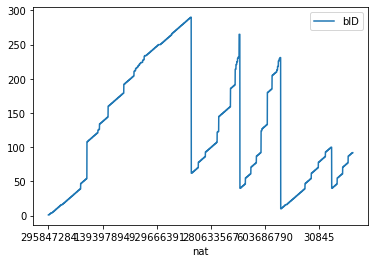

In [145]:
sql_query = pd.read_sql_query('''SELECT eh.BusinessEntityID as bID, d.Name as n, e.NationalIDNumber as nat
FROM HumanResources.EmployeeDepartmentHistory as eh, HumanResources.Employee as e,HumanResources.Department as d
WHERE d.Name= 'Executive' or d.Name='Sales' and eh.BusinessEntityID between 10 and 100 ''',connection)
print(sql_query)
sql_query.plot(x='nat', y='bID')